# Clasificación y Optimización de Hiperparámetros (Core)

Objetivo: Implementar un pipeline completo de machine learning para un problema de clasificación utilizando técnicas de preprocesamiento, modelado, y optimización de hiperparámetros. Enfocar especialmente en la limpieza de datos y la optimización utilizando GridSearchCV y RandomizedSearchCV.


Descripción del Dataset: El dataset de costos médicos personales contiene información sobre varios factores que afectan los costos de seguros médicos, como la edad, el sexo, el índice de masa corporal, y el hábito de fumar. Este dataset es ideal para practicar técnicas de preprocesamiento y optimización de modelos debido a la presencia de datos sucios y variables tanto categóricas como numéricas.

### Carga y Exploración Inicial de Datos:
- Cargar el dataset desde Kaggle.
- Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.
- Identificar y documentar los valores faltantes y outliers en el dataset.

In [1]:
# Importamos librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, recall_score, roc_curve, f1_score


**Cargar el dataset.**

In [2]:
# carga datos a dataframe
df = pd.read_csv('insurance.csv')

In [3]:
# miramos los datos
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Realizar una exploración inicial para entender la estructura del dataframe.

In [4]:
# Mirams la estructura del DF con sus tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Identificar y documentar los valores faltantes y outliers en el dataset.

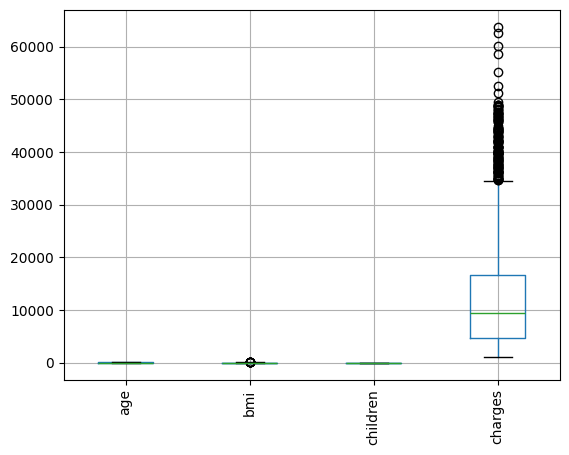

In [5]:
# analizamos datos atipicos en todas las columnas numericas del dataframe
df.boxplot(column=df.select_dtypes(include=np.number).columns.tolist())
plt.xticks(rotation=90)
plt.show()


Podemos apreciar que la columna 'charges' contiene valores nulos en una gran cantidad

### Preprocesamiento de Datos
- Imputar valores faltantes utilizando técnicas adecuadas (media, mediana, moda, imputación avanzada).
- Codificar variables categóricas utilizando One-Hot Encoding.
- Escalar características numéricas utilizando StandardScaler.

Imputar valores faltantes utilizando técnicas adecuadas (media, mediana, moda, imputación avanzada).

In [6]:
# buscamos valores nulos
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


No existen valores nulos

Codificar variables categóricas utilizando One-Hot Encoding

Escalar características numéricas utilizando StandardScaler

In [7]:
# Definimos las columnas de caracteristicas y el target
X = df.drop('charges', axis=1)
y = df['charges']

In [8]:
# agrupamos columnas para usar en transformadores.
num_cols = ["age","bmi","children"]
nom_cols = ["sex","smoker","region"]

Transformadores

In [9]:
# Se define transformador para Regrsion Logistica
preprocessor_rl = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols),
    ("nom", OneHotEncoder(handle_unknown='ignore'), nom_cols)
])

In [10]:
# Se define transformador para knn
preprocessor_knn = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols),
    ("nom", OneHotEncoder(handle_unknown='ignore'), nom_cols)
])

In [24]:
# Se define transformador para Arbol de Decision
preprocessor_tree = ColumnTransformer(transformers=[
    ("num", 'passthrough', num_cols),
    ("nom", OneHotEncoder(handle_unknown='ignore'), nom_cols)
])

Implementación de Modelos de Clasificación
- Entrenar y evaluar al menos tres modelos de clasificación diferentes:  Regresión Logística, K-Nearest Neighbors (KNN), y Árbol de Decisión.
- Utilizar validación cruzada para evaluar el rendimiento inicial de los modelos.

In [12]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Regresion Logistica

In [13]:
# Pipeline de Modelo Regresion Logistica.
pipeline_rl = Pipeline([
    ("preprocessing", preprocessor_rl),
    ("model", LinearRegression())
])

In [14]:
# Estructura de Pipeline de Modelo Regresion Logistica.
pipeline_rl

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', LinearRegression())])

In [15]:
# entrenamos modelo de Regresion con validacion cruzada
scores_rl = cross_val_score(pipeline_rl, X_train, y_train, cv=5)
# validamos el modelo
scores_rl

array([0.71585461, 0.80210564, 0.72296123, 0.65784333, 0.76678575])

In [16]:
# validamos el modelo
scores_rl.mean()

np.float64(0.7331101109097584)

KNN

In [17]:
# Pipeline de Modelo knn.
pipeline_knn = Pipeline([
    ("preprocessing", preprocessor_knn),
    ("model", KNeighborsRegressor())
])

In [18]:
# Estructura de Pipeline de Modelo KNN.
pipeline_knn

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', KNeighborsRegressor())])

In [19]:
# entrenamos modelo de KNN con validacion cruzada
scores_knn = cross_val_score(pipeline_knn, X_train, y_train, cv=5)
# validamos el modelo
scores_knn

array([0.77006321, 0.79471632, 0.73583728, 0.69278046, 0.76102081])

In [20]:
# validamos el modelo
scores_knn.mean()

np.float64(0.7508836164042616)

Arbol de Decision

In [25]:
# Pipeline de Modelo Arbol de Decision.
pipeline_tree = Pipeline([
    ("preprocessing", preprocessor_tree),
    ("model", DecisionTreeRegressor())
])

In [26]:
# Estructura de Pipeline de Modelo Arbol de Decision.
pipeline_tree

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'bmi', 'children']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', DecisionTreeRegressor())])

In [27]:
# entrenamos modelo de Arbol de Decision con validacion cruzada
scores_tree = cross_val_score(pipeline_tree, X_train, y_train, cv=5)
# validamos el modelo
scores_tree

array([0.73004072, 0.73650568, 0.58304245, 0.66508477, 0.75855273])

In [28]:
# validamos el modelo
scores_tree.mean()

np.float64(0.694645270434594)

### Optimización de Hiperparámetros:
- Implementar GridSearchCV para optimizar los hiperparámetros de los modelos seleccionados.
- Implementar RandomizedSearchCV como método alternativo de optimización.
- Comparar los resultados de GridSearchCV y RandomizedSearchCV para los modelos optimizados.

Implementar GridSearchCV para optimizar los hiperparámetros de los modelos seleccionados.

Regresion Lineal

In [29]:
# Optimizacion de hiperparametros de Regresion Lineal.
rl_params = {
    "model__n_jobs": [1, 2, 3, 5], #
}

rl_grid = GridSearchCV(pipeline_rl, rl_params, cv=3, scoring="r2")
rl_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('nom',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('model', LinearRegression())]),
             param_grid={'model__n_jobs': [1, 2, 3, 5]}, scoring='r2')

In [30]:
# Evaluación.
rl_best = rl_grid.best_estimator_
y_pred_rl = rl_best.predict(X_test)

print("Lineal Regressor")
print("Mejores parámetros:", rl_grid.best_params_)
print("R²:", r2_score(y_test, y_pred_rl))

Lineal Regressor
Mejores parámetros: {'model__n_jobs': 1}
R²: 0.7835929767120722


KNN

In [31]:
# Optimizacion de hiperparametros de Regresion Lineal.
knn_params = {
    "model__n_neighbors": [3, 5, 7, 9],
    "model__weights": ["uniform", "distance"],
    "model__p": [1, 2]
}

knn_grid = GridSearchCV(pipeline_knn, knn_params, cv=3, scoring="r2")
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('nom',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [3, 5, 7, 9], 'model__p': [1, 2],
                         'model__weights': ['uniform', 'distance']},
             scoring='r2')

In [32]:
# Evaluación.
knn_best = knn_grid.best_estimator_
y_pred_knn = knn_best.predict(X_test)

print("KNN Regressor")
print("Mejores parámetros:", knn_grid.best_params_)
print("R²:", r2_score(y_test, y_pred_knn))

KNN Regressor
Mejores parámetros: {'model__n_neighbors': 7, 'model__p': 1, 'model__weights': 'distance'}
R²: 0.794374107565033


Arbol de Decision

In [33]:
# Optimizacion de hiperparametros de Arbol de Decision.
tree_params = {
    "model__max_depth": [5, 7, 10, 15],
    "model__min_samples_split": [2, 3, 4, 5, 6],
    "model__min_samples_leaf": [1, 2, 4]
}

tree_grid = GridSearchCV(pipeline_tree, tree_params, cv=3, scoring="r2")
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('nom',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('model', DecisionTreeRegressor())]),
             param_grid={'model__max_depth': [5, 7, 10, 15],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 3, 4, 5, 6]},
             scoring='r2')

In [34]:
# Evaluación.
tree_best = tree_grid.best_estimator_
y_pred_tree = tree_best.predict(X_test)

print("Tree Regressor")
print("Mejores parámetros:", tree_grid.best_params_)
print("R²:", r2_score(y_test, y_pred_knn))

Tree Regressor
Mejores parámetros: {'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2}
R²: 0.794374107565033


### Evaluación de Modelos
- Evaluar los modelos optimizados utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.
- Generar y analizar la matriz de confusión para los modelos optimizados.
- Crear y visualizar la curva ROC para evaluar la capacidad del modelo para distinguir entre clases.

Evaluar los modelos optimizados utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.

Regresion Lineal

In [35]:
# Validar modelo de Regresion optimizados utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.

# mse
mse = mean_squared_error(y_test, y_pred_rl)
print(f"MSE: {mse:.2f}")

#r2
r2 = r2_score(y_test, y_pred_rl)
print(f"R² (score): {r2:.2f}")

MSE: 33596915.85
R² (score): 0.78


In [36]:
# matriz de confucion de Regresion Lineal
confusion_matrix = pd.crosstab(y_test, y_pred_rl, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,-1545.571849,-914.373424,-441.239183,-86.870947,170.280841,1048.355338,1092.430936,1120.178105,1268.059266,1482.294883,...,36632.497550,36858.410912,37098.253531,37260.326664,38416.042211,38670.012704,39061.500932,39807.969127,40255.823393,40920.291512
Actual,,,,,,,,,,,,,,,,,,,,,
1131.50660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1146.79660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1256.29900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1391.52870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1534.30450,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46661.44240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
47055.53210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48673.55880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


KNN

In [37]:
# Validar modelo de Regresion optimizados utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.

# mse
mse = mean_squared_error(y_test, y_pred_knn)
print(f"MSE: {mse:.2f}")

#r2
r2 = r2_score(y_test, y_pred_knn)
print(f"R² (score): {r2:.2f}")

MSE: 31923158.96
R² (score): 0.79


In [38]:
# Matriz de confusion de KNN
confusion_matrix = pd.crosstab(y_test, y_pred_knn, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,1320.779184,1345.762379,1402.741573,1487.626313,1532.628579,1639.563100,1720.758000,1748.438403,1791.324589,1793.543769,...,40291.148837,41273.565405,42540.432618,43366.017179,43457.109983,44119.482285,44245.076384,44678.557010,45173.749977,45818.830423
Actual,,,,,,,,,,,,,,,,,,,,,
1131.50660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1146.79660,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1256.29900,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1391.52870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1534.30450,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46661.44240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47055.53210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
48673.55880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Arbol de Decision

In [39]:
# Validar modelo de Regresion optimizados utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.

# mse
mse = mean_squared_error(y_test, y_pred_tree)
print(f"MSE: {mse:.2f}")

#r2
r2 = r2_score(y_test, y_pred_tree)
print(f"R² (score): {r2:.2f}")

MSE: 20442765.16
R² (score): 0.87


In [40]:
# Matriz de confusion de Arbol de Decision
confusion_matrix = pd.crosstab(y_test, y_pred_tree, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix


Predicted,1847.031527,3289.312092,4023.745475,5243.041297,6458.473365,6941.957358,8142.540800,9718.708317,9919.086834,9947.544698,...,20323.204158,24510.021967,26306.769872,34232.778608,35830.543256,37880.189809,41496.573177,45675.050899,46384.170421,48019.674745
Actual,,,,,,,,,,,,,,,,,,,,,
1131.50660,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1146.79660,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1256.29900,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1391.52870,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1534.30450,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46661.44240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
47055.53210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
48673.55880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


No Aplica curva de ROC